## 최근접 알고리즘 K-nearest neighbor
1. 한 점을 잡고 그 점에서 가장 가까운 n개의 점을 찾는다,
2. 그리고 그 더 많은 점의 결과를 따라간다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris_data = datasets.load_iris()

In [3]:
type(iris_data)
# print(iris_data['DESCR'])
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Minkowski Distance: 1차원, 2차원 거리    
$${ \left( \sum_{i=1}^{n} {{\left\lvert{a_i-b_i}\right\lvert}^p} \right)^\frac{1}{p} }$$
<!-- $$ \frac {1}{p} == \pm \sqrt{1\over p} $$ -->

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [5]:
X = iris_data.data
y = iris_data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=35)

In [6]:
np.bincount(y_train)

array([34, 36, 35], dtype=int64)

In [7]:
# build a model
clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
# train a model
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
y_predict=clf.predict(X_test)

In [10]:
T=np.count_nonzero((y_predict == y_test)==True)
F=np.count_nonzero((y_predict == y_test)==False)
print(T,F)

41 4


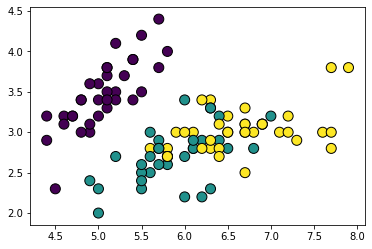

In [11]:
plt.scatter(X_train[:,0],X_train[:,1],edgecolor ='k', s=100,c=y_train)

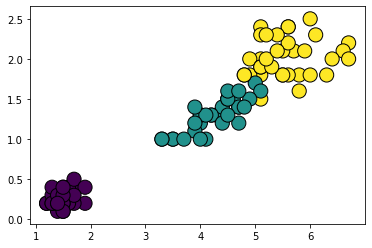

In [12]:
plt.scatter(X_train[:,2],X_train[:,3],edgecolor ='k', s=200, c=y_train)

In [13]:
clf.score(X_train,y_train)

0.9904761904761905

In [14]:
import pandas as pd

In [36]:
iris_df = pd.DataFrame(X_train,columns = iris_data.feature_names)
iris_df_label = pd.DataFrame(y_train,columns=['Species'])

# 지금은 같은결과, merge는 좀더 다양하게 다룰 수 있다 (join이라던지, 부가기능 많이보유)
# iris_df_final = pd.merge(iris_df,iris_df_label,how='left',left_index=True,right_index=True)
iris_df_final = pd.concat([iris_df,iris_df_label],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4FE2020F0>,
      dtype=object)

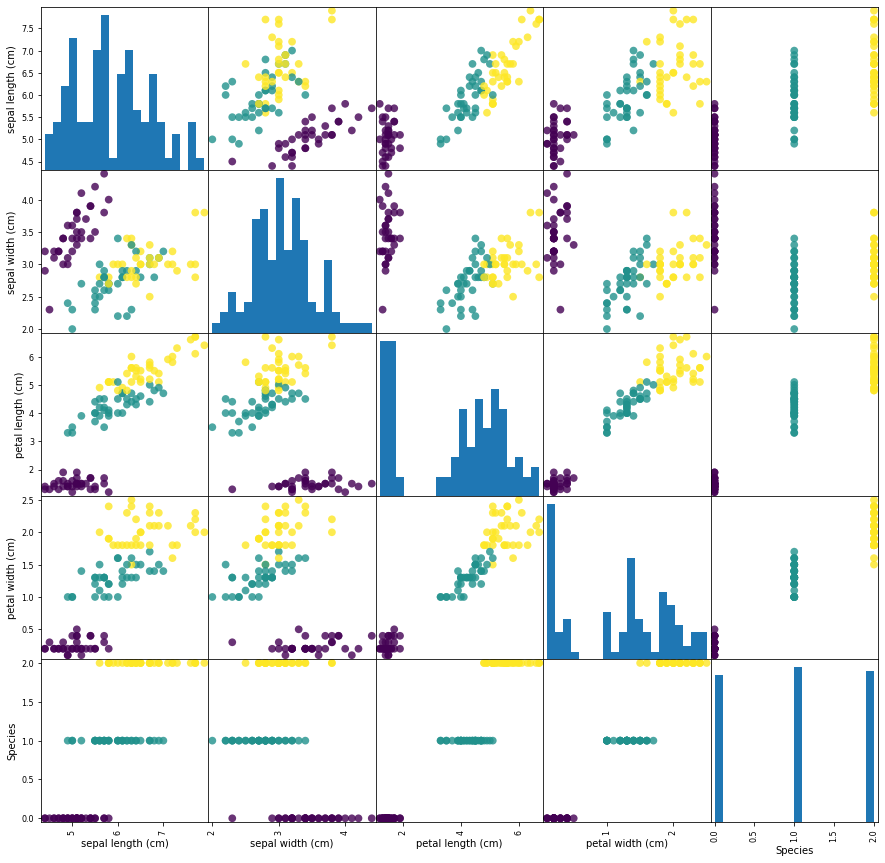

In [41]:
pd.plotting.scatter_matrix(iris_df_final,c=y_train, figsize = (15,15),marker ='o',hist_kwds={'bins':20}, s = 60, alpha = 0.8)


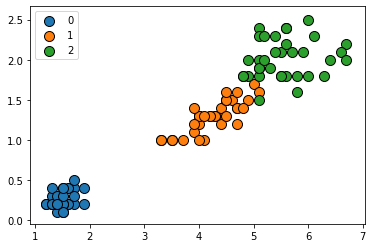

In [22]:
X_groupby1=[]
X_groupby2=[]
for i in range(3):
    X_groupby1.append(X_train[:,2][y_train==i])
    X_groupby2.append(X_train[:,3][y_train==i])
    
    
for i in range(3):
    plt.scatter(X_groupby1[i],X_groupby2[i],s=100,edgecolor='k',label=i)
    plt.legend()


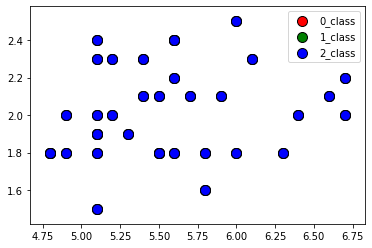

In [23]:
colors=['r','g','b']
classes=['0_class','1_class','2_class']
for co,cl in zip(colors,classes):
    idx_species = y_train==i
    plt.scatter(X_train[idx_species,2],X_train[idx_species,3],s=100,color=co,edgecolors='k',label=cl)
plt.legend()


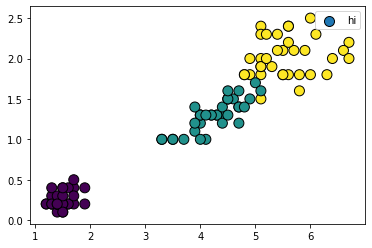

In [24]:
plt.scatter(X_train[:,2],X_train[:,3],s=100,edgecolors='k', c=y_train,label='hi')
plt.legend(loc='best')

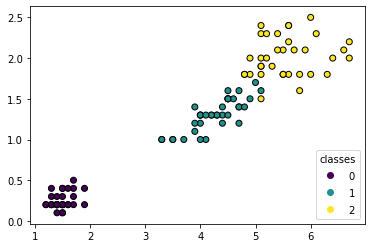

In [25]:
fig,ax = plt.subplots()
scatter = ax.scatter(X_train[:,2],X_train[:,3],edgecolor='k',c=y_train)
ax.legend(*scatter.legend_elements(),loc='lower right',title='classes')